<a href="https://colab.research.google.com/github/elamraouiabir6963encg-rgb/DS2025/blob/main/readme_Abir_El_Amraoui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Aperçu des données :
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6 

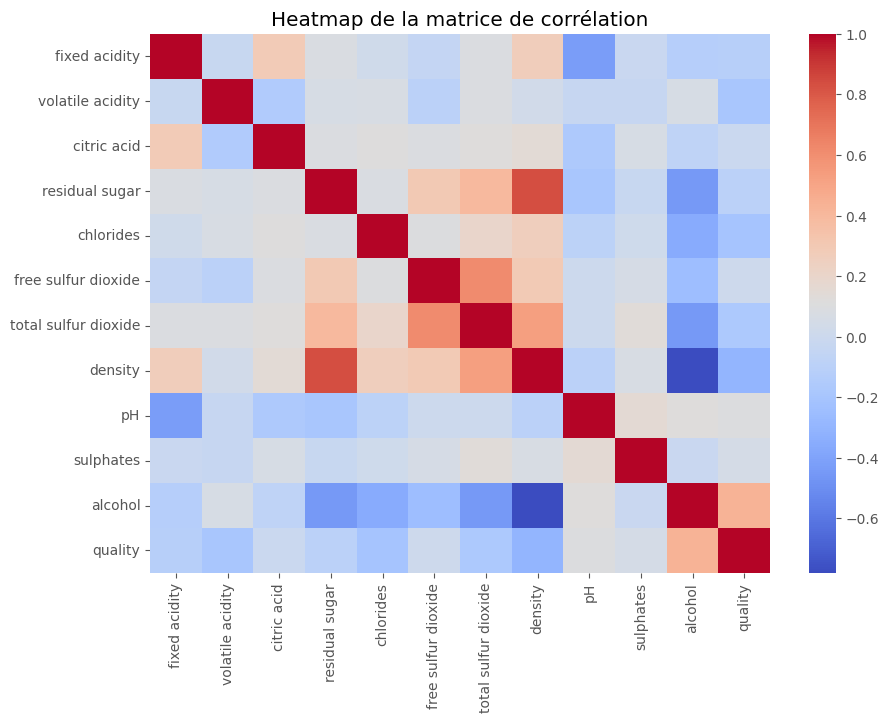

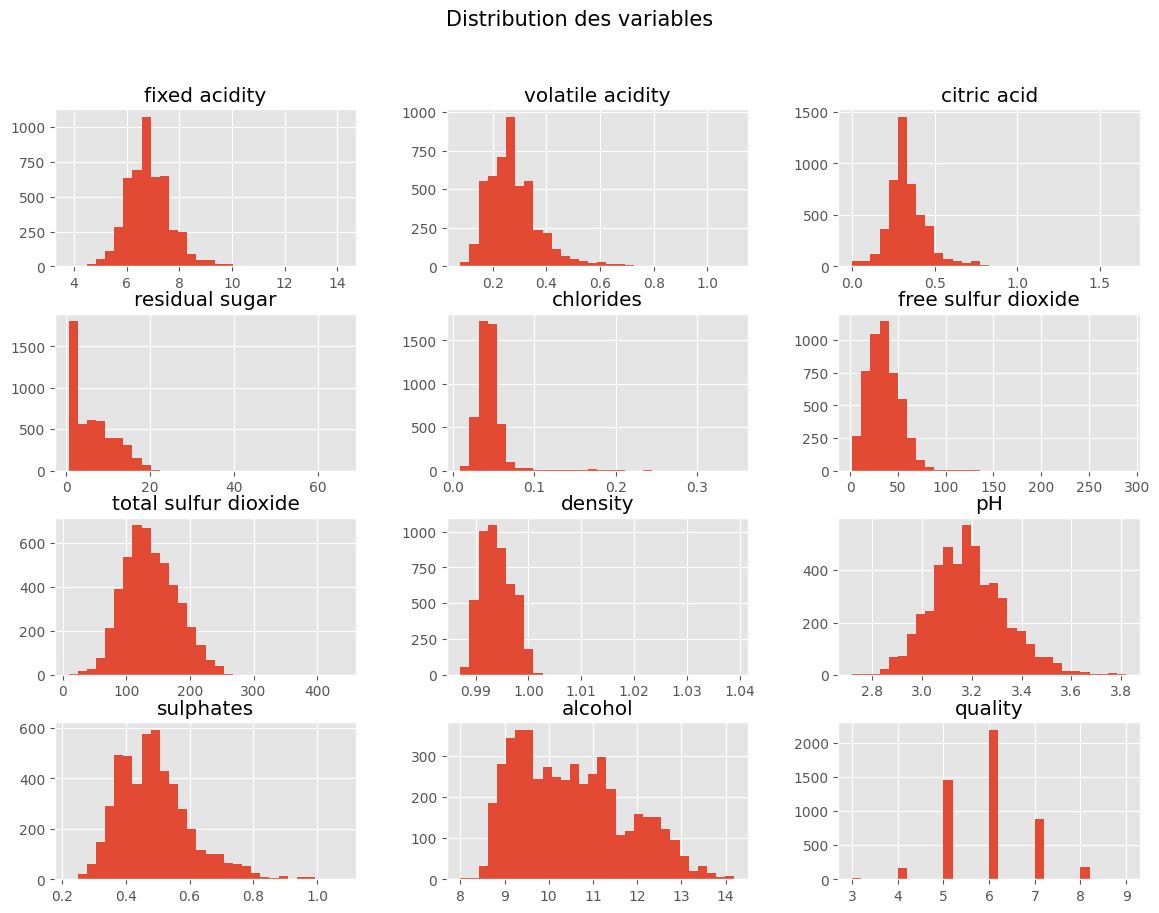

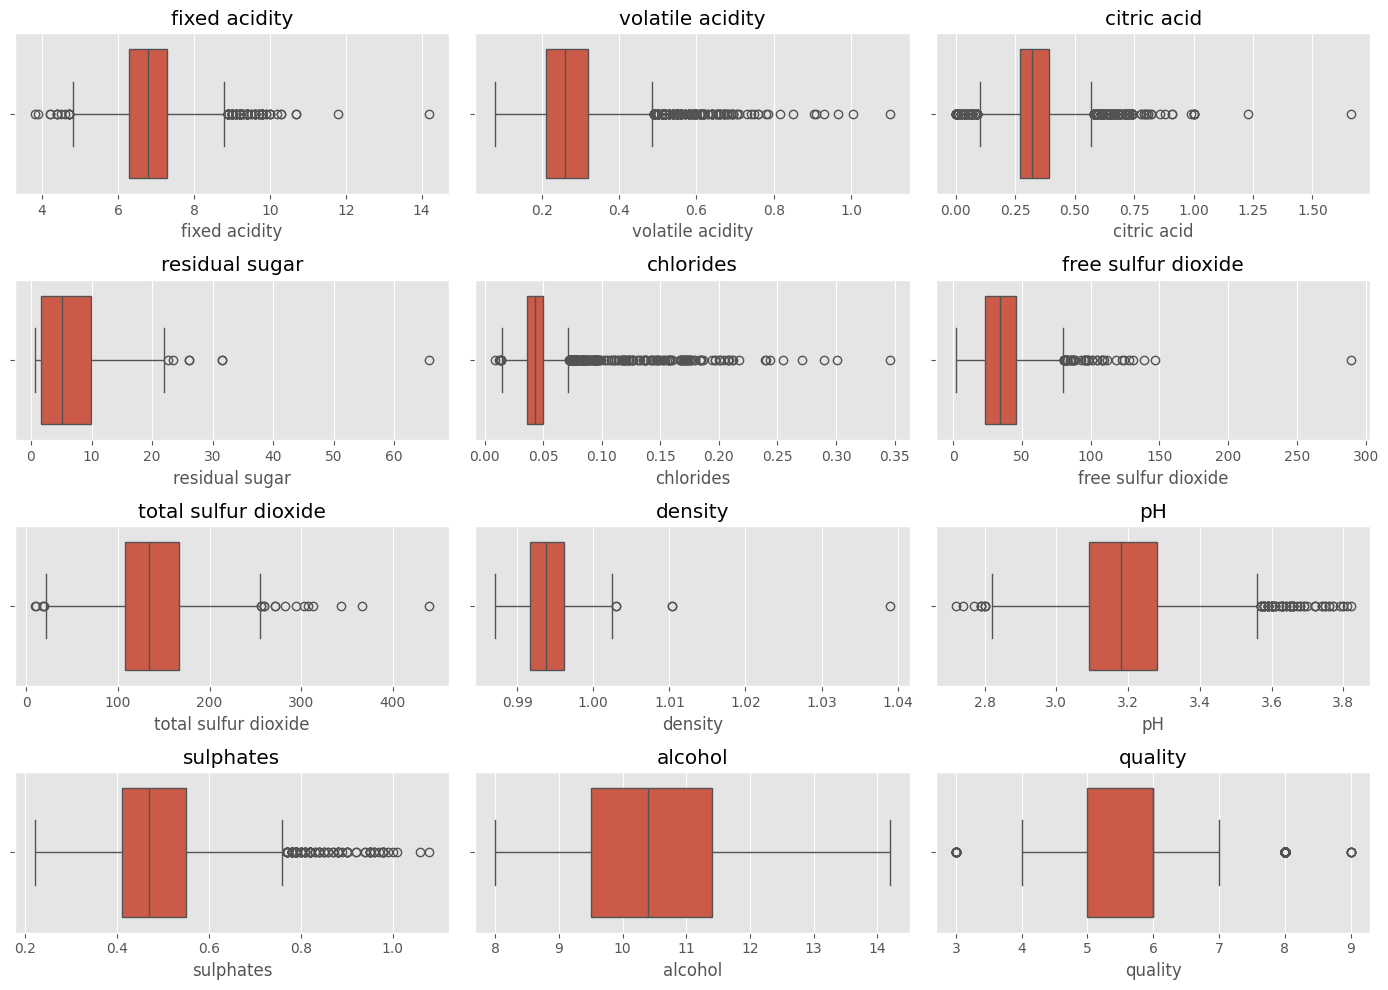


===== TEST SHAPIRO (Normalité) =====
fixed acidity: p-value=0.0000 -> Non normal
volatile acidity: p-value=0.0000 -> Non normal
citric acid: p-value=0.0000 -> Non normal
residual sugar: p-value=0.0000 -> Non normal
chlorides: p-value=0.0000 -> Non normal
free sulfur dioxide: p-value=0.0000 -> Non normal
total sulfur dioxide: p-value=0.0185 -> Non normal
density: p-value=0.0000 -> Non normal
pH: p-value=0.0000 -> Non normal
sulphates: p-value=0.0000 -> Non normal
alcohol: p-value=0.0000 -> Non normal
quality: p-value=0.0000 -> Non normal

===== VARIANCE EXPLIQUÉE =====
PC1 : 29.29%
PC2 : 14.32%
PC3 : 11.11%
PC4 : 9.26%
PC5 : 8.85%


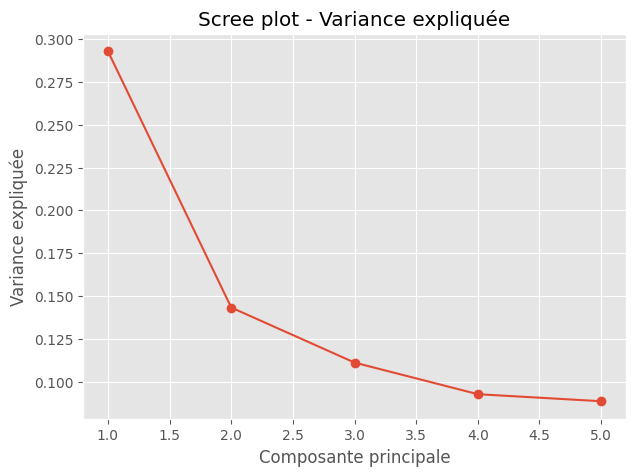

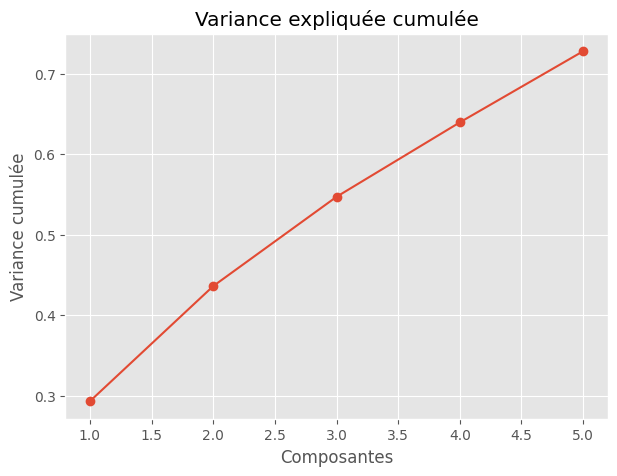

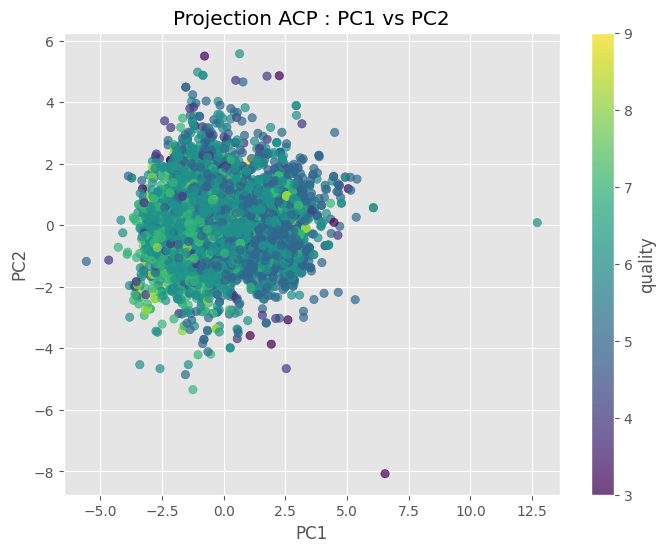

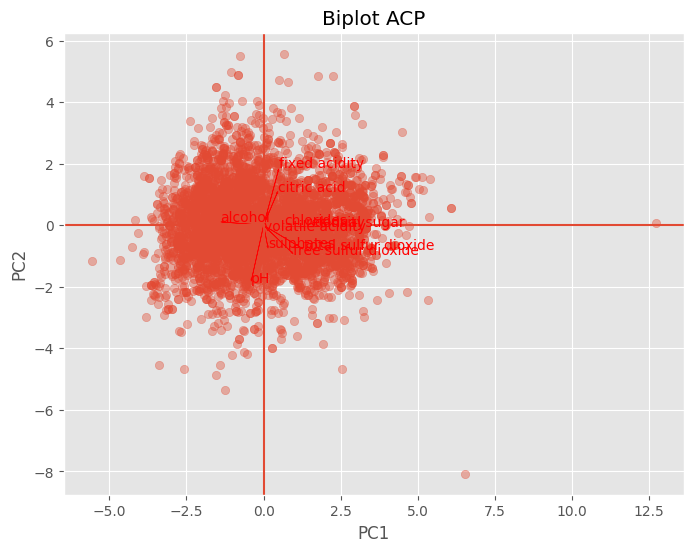

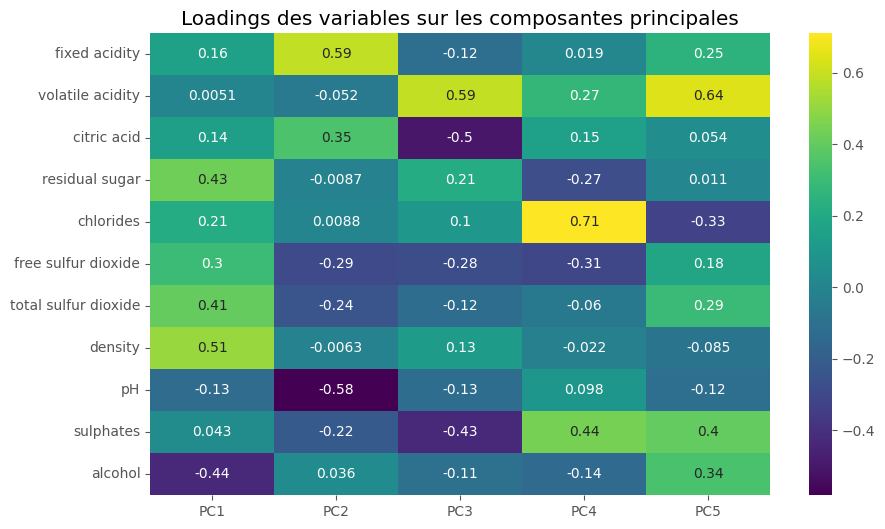

In [ ]:
# ======================================================
#   ANALYSE STATISTIQUE + ACP + VISUALISATIONS COMPLETES
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import shapiro

# ------------------------------------------------------
# 1) Charger la BDD
# ------------------------------------------------------
df = pd.read_csv("winequality-white.csv", sep=';')
print("\nAperçu des données :")
print(df.head())

# ------------------------------------------------------
# 2) ANALYSE STATISTIQUE
# ------------------------------------------------------

print("\n===== STATISTIQUES DESCRIPTIVES =====")
print(df.describe().T)

# Valeurs manquantes
print("\n===== VALEURS MANQUANTES =====")
print(df.isnull().sum())

# ------------------------------------------------------
# 3) MATRICE DE CORRÉLATION (GRAPHE)
# ------------------------------------------------------
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap de la matrice de corrélation")
plt.show()

# ------------------------------------------------------
# 4) DISTRIBUTION DES VARIABLES (HISTOGRAMMES)
# ------------------------------------------------------
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Distribution des variables", fontsize=15)
plt.show()

# ------------------------------------------------------
# 5) BOXPLOTS (OUTLIERS)
# ------------------------------------------------------
plt.figure(figsize=(14,10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 6) TEST DE NORMALITÉ SHAPIRO-WILK
# ------------------------------------------------------
print("\n===== TEST SHAPIRO (Normalité) =====")
for col in df.columns:
    sample = df[col].sample(500, random_state=0)  # max pour Shapiro
    stat, p = shapiro(sample)
    print(f"{col}: p-value={p:.4f} -> {'Non normal' if p < 0.05 else 'Normal'}")

# ------------------------------------------------------
# 7) PREPARATION DES DONNÉES POUR L’ACP
# ------------------------------------------------------
X = df.drop(columns=['quality'])
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------
# 8) ACP
# ------------------------------------------------------
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

print("\n===== VARIANCE EXPLIQUÉE =====")
for i, v in enumerate(explained_var, start=1):
    print(f"PC{i} : {v*100:.2f}%")

# -------------------------
# SCREE PLOT
# -------------------------
plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree plot - Variance expliquée")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.grid(True)
plt.show()

# -------------------------
# VARIANCE CUMULÉE
# -------------------------
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.title("Variance expliquée cumulée")
plt.xlabel("Composantes")
plt.ylabel("Variance cumulée")
plt.grid(True)
plt.show()

# -------------------------
# PROJECTION PC1 vs PC2
# -------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label="quality")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection ACP : PC1 vs PC2")
plt.grid(True)
plt.show()

# -------------------------
# BIPLOT (loadings + individus)
# -------------------------
loadings = pca.components_.T
features = X.columns

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.4)

for i, var in enumerate(features):
    plt.arrow(0, 0, loadings[i,0]*3, loadings[i,1]*3,
              color='red', head_width=0.05)
    plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, var, color='red')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot ACP")
plt.axhline(0); plt.axvline(0)
plt.grid(True)
plt.show()

# -------------------------
# HEATMAP DES LOADINGS
# -------------------------
load_df = pd.DataFrame(loadings, index=features,
                       columns=[f"PC{i}" for i in range(1,6)])

plt.figure(figsize=(10,6))
sns.heatmap(load_df, annot=True, cmap="viridis")
plt.title("Loadings des variables sur les composantes principales")
plt.show()
